# Chapter 1. Exploratory Data Analysis

필요한 패키지들을 설치 및 불러오기 합니다.

In [ ]:
!pip install statsmodels
!pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline 

from pathlib import Path
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust # conda install
import wquantiles # pip install
import seaborn as sns
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터를 불러오기 위한 경로를 설정합니다. 반드시 필요한 csv 파일이 경로 상에 위치해야 파일을 불러올 수 있습니다.

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
DATA = os.getcwd() + '/drive/MyDrive/Data'

In [ ]:
AIRLINE_STATS_CSV = DATA + '/airline_stats.csv'
KC_TAX_CSV = DATA +'/kc_tax.csv'
LC_LOANS_CSV = DATA + '/lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + '/dfw_airline.csv'
SP500_DATA_CSV = DATA + '/sp500_px.csv'
SP500_SECTORS_CSV = DATA + '/sp500_sym.csv'
STATE_CSV = DATA + '/state.csv'

## Estimates of Location(위치)
### Example: Location Estimates of Population and Murder Rates

In [ ]:
state = pd.read_csv(STATE_CSV)
print(state.head(5))

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA


평균, 중위값, 절사평균(trimmed mean)을 구해보자

In [ ]:
print(state['Population'].mean())
print(state['Population'].median())
print(trim_mean(state['Population'], 0.1)) # 절삭평균은 scipy.stats 패키지 안에 있으며 양쪽에 절삭되는 비율이 안에 들어간다.


6162876.3
4436369.5
4783697.125


가중평균, 가중중위수를 구해보자

In [ ]:
print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.066
4.445833981123393
4.4


## Estimates of Variability(산포)

표준편차, 3사분위수와 1사분위수의 차이, MAD(Median Absoulte Deivation)

In [ ]:
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print("")
print(robust.scale.mad(state['Population'])*0.6744897501960817)
print(abs(state['Population'] - state['Population'].median()).median() )

6848235.347401142
4847308.0

2596702.0
2596702.0


In [ ]:
aa = pd.Series([3,1,5,3,6,3,7,2,9])
aa.quantile([0.5])

0.5    3.0
dtype: float64

In [ ]:
np.quantile(np.array([1,2,3,4,5,6,7,8,9,10]), 0.5)

5.5

In [ ]:
Data = pd.Series([3,1,5,3,6,7,2,9])
print(Data.quantile([0.25, 0.75]))

Data.describe()

0.25    2.75
0.75    6.25
dtype: float64


count    8.000000
mean     4.500000
std      2.725541
min      1.000000
25%      2.750000
50%      4.000000
75%      6.250000
max      9.000000
dtype: float64

## 데이터 분포 탐색하기 1
## Percentiles and Boxplots

In [ ]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


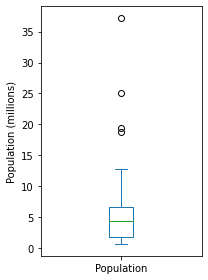

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

## 데이터 분포 탐색하기 2
## Frequency Table and Histograms

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


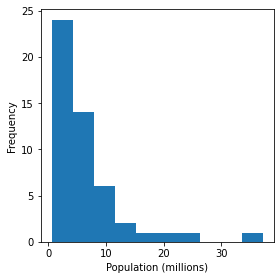

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

'density=True' 명령을 통해 빈도가 아닌 밀도를 표현할 수 있다. 

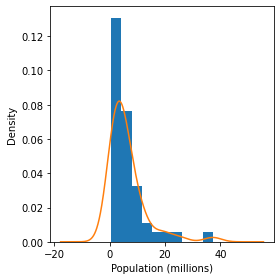

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(density=True,  figsize=(4, 4))
(state['Population'] / 1_000_000).plot.density(ax=ax)
ax.set_xlabel('Population (millions)')
ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

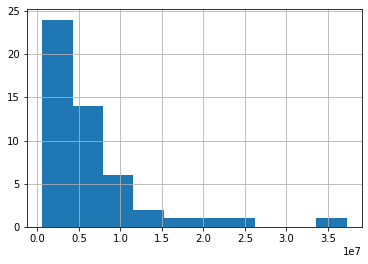

In [ ]:
state['Population'].hist(bins=10)

## Binary and Categorical Data

In [ ]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


비율로 나타내기

In [ ]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Bar plot으로 나타내기

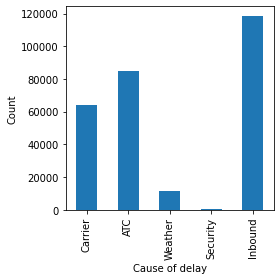

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation

변수간의 관계를 살펴보자

In [ ]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [ ]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [ ]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

In [ ]:
telecomSymbols # Series

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [ ]:
sp500_px.head(5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Dates,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [ ]:
sp500_px.loc[sp500_px.index >= '2012-07-01'].head(5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Dates,,,,,,,,,,,,,,,,,,,,,
2012-07-02,1.190002,-0.224999,-0.055103,-0.560002,-0.455000,-0.104774,-0.279545,-0.495967,-0.018692,-0.152205,...,-0.970001,3.830002,1.257135,0.0,2.110001,0.105000,0.219207,5.610000,-0.539997,-0.189994
2012-07-03,0.440002,0.125998,0.486724,0.849998,0.165001,0.219071,0.308464,0.439807,0.093461,0.409055,...,1.090004,-0.510002,1.058641,0.0,0.100006,0.440002,0.274009,1.300003,-0.170002,0.519997
2012-07-05,-0.369995,-0.116998,0.101019,0.459999,0.395001,-0.038100,-0.269906,0.383662,0.186922,-0.475645,...,0.690003,-0.489998,0.255211,0.0,-0.600006,-0.175003,-0.283971,-0.630005,0.000000,0.369995
2012-07-06,0.319992,-0.476996,-0.385706,-2.159999,-0.920000,-0.523868,-0.279546,-2.348823,0.074769,-0.742004,...,-1.330001,-1.980003,-0.396989,0.0,-1.569992,-0.170002,-0.254081,-0.659996,-0.869999,-0.970002
2012-07-09,-0.070007,-0.152999,-0.110203,-1.880001,-0.139999,-0.114299,-0.279544,-1.020006,-0.084115,-0.494672,...,-1.029999,-0.599999,0.680554,0.0,0.220002,0.069999,0.194296,-2.349998,-1.310002,-0.350006


In [ ]:
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

In [ ]:
telecom

,T,CTL,FTR,VZ,LVLT
Dates,,,,,
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000


In [ ]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


만약 변수가 많은 경우에 correlation matrix를 한눈에 파악하기 힘들다. 이때는 seaborn package를 사용해서 Heatmap을 그릴 수 있다.

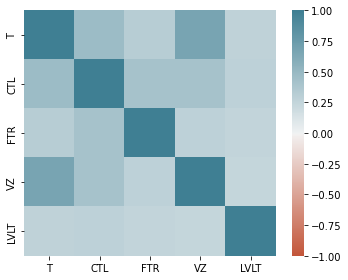

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(telecom.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

## Scatterplot

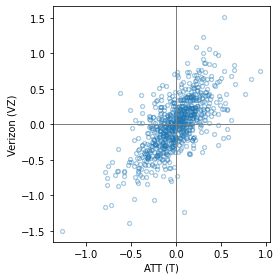

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha = 0.3)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

## scatterplot을 그리고 싶은데 많은 점들이 겹치는 경우

1. hexagonal binning
2. contours

(432693, 3)


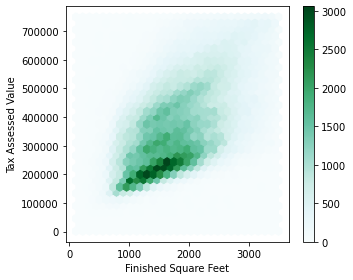

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)


# plot
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

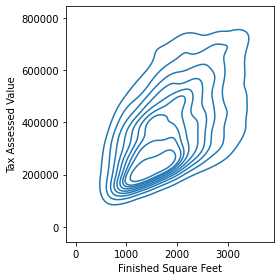

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Categorical Variables

### contingency table

pivot_table 함수를 사용해서 분할표 만들기

In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans

,status,grade
0,Fully Paid,5.4
1,Charged Off,4.8
2,Fully Paid,5.0
3,Fully Paid,4.2
4,Current,6.0
...,...,...
450956,Current,3.8
450957,Current,3.2
450958,Current,4.0
450959,Current,3.2


In [ ]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
0.2             146      661         216    63    1086
0.4              96      524         138    42     800
0.6              63      360         101    45     569
0.8              51      228         100    32     411
1.0              53      217          88    17     375
1.2             400     2598         686   161    3845
1.4             333     1875         576   140    2924
1.6             302     1748         448   134    2632
1.8             267     1309         347    91    2014
2.0             224      914         271    80    1489
2.2             597     6401        1435   299    8732
2.4             670     6011        1470   301    8452
2.6             561     4798        1186   256    6801
2.8             547     4066        1001   251    5865
3.0             467     3363         857   267    4954
3.2            1095    13553        3380   533   18561
3.4       

## Categorical and Numeric Data

### side-by-side boxplot

In [ ]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


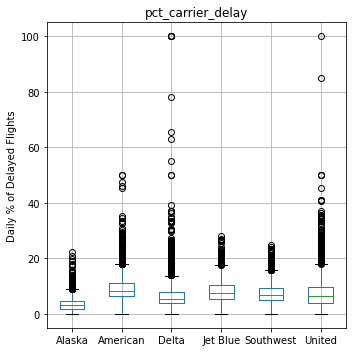

In [ ]:
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

만일 산포를 함께 표현하고 싶다면 violin plot을 사용한다.

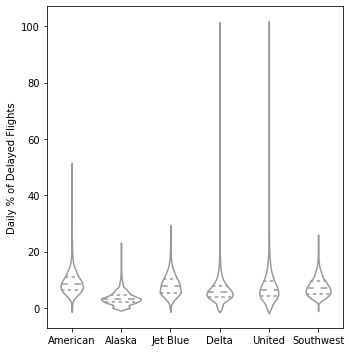

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', inner='quartile', color='white')

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables(참고)

In [ ]:
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


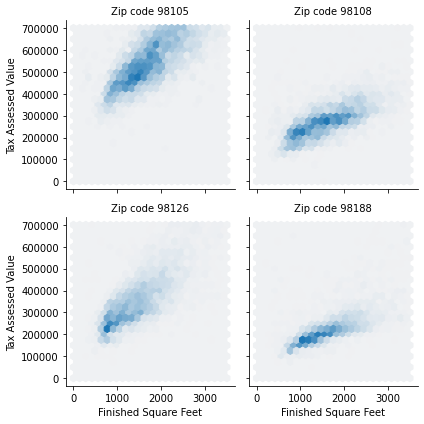

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000]) # x축, y축
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()